In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline

In [2]:
TD = pd.read_csv('titanic_data.csv')

In [3]:
TD.head(15)

#TD.describe()
# TD.dtypes
# TD.notna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
outcomes = TD['Survived']
features_raw = TD.drop('Survived', axis = 1)

display(features_raw.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

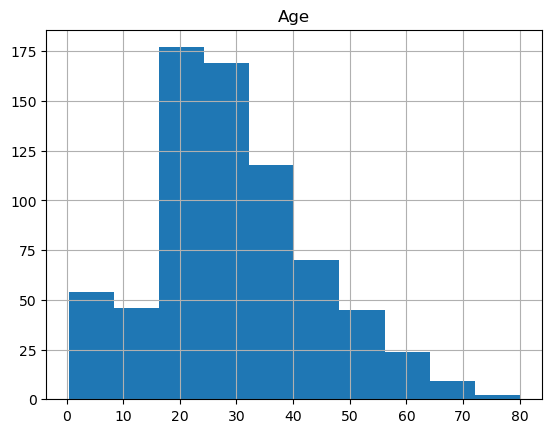

In [5]:
TD.hist(column="Age")

<Axes: xlabel='Pclass'>

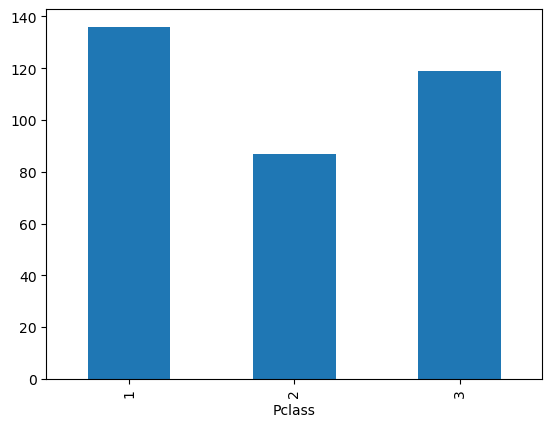

In [6]:
# Passengers who survived by class
TD.groupby('Pclass').Survived.sum().plot(kind='bar')

<Axes: xlabel='Sex'>

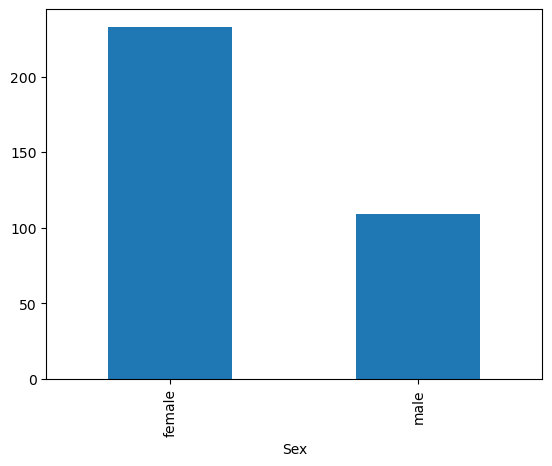

In [7]:
# Gender and Survived 
TD.groupby('Sex').Survived.sum().plot(kind='bar')

<Axes: xlabel='SibSp'>

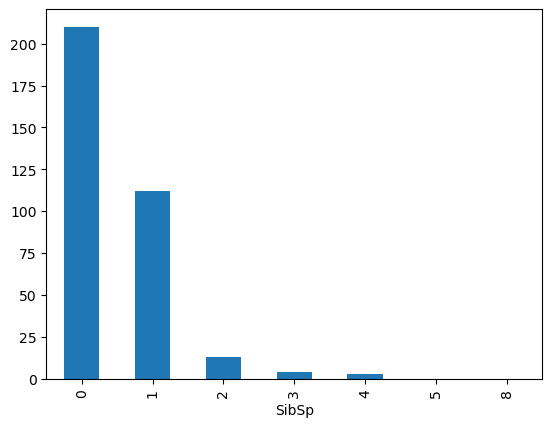

In [9]:
# Has siblings and survived

TD.groupby('SibSp').Survived.sum().plot(kind='bar')

In [18]:
# removing the names 
features_no_names = features_raw.drop(['Name'], axis=1)

# one-hot encoding  and encoding converts categorical data to 1 or 0 true or false 
features = pd.get_dummies(features_no_names) 

#lets fill in the blanks with zeros 
features = features.fillna(0.0)
display(features.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
# lets split the data into trainning and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [64]:
# lets get the classifier from sklearn 
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier and fit it to the data 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
# lets test the model 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [66]:
#calculate the accurracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
print('The training accuracy is: ', train_accuracy)


test_accuracy = accuracy_score(y_test,y_test_pred)
print('The test accuracy is:',test_accuracy)

The training accuracy is:  1.0
The test accuracy is: 0.8156424581005587
